In [109]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#reading a training set
train_data=pd.read_csv('train_Df64byy.csv')
print(train_data.shape)# printing shape of the training set
train_data.head(5)# printing first five rows

(50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [111]:
test_data=pd.read_csv('test_YCcRUnU.csv')#reading test data
print(test_data.shape)#printing shape of test data
test_data.head(5)##printing first five rows

(21805, 13)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


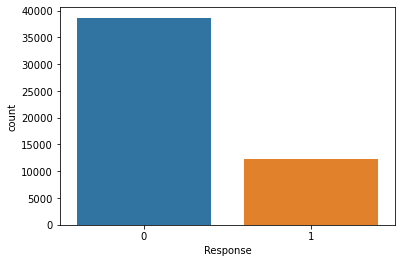

In [112]:
#ploting a graph of customer response
sns.countplot('Response',data=train_data)

In [113]:
#printing how many custemers are greed & howmany not
train_data.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

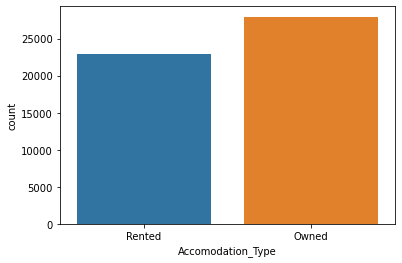

In [114]:
#graph of costumers Accomodation Type
sns.countplot('Accomodation_Type',data=train_data)

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64


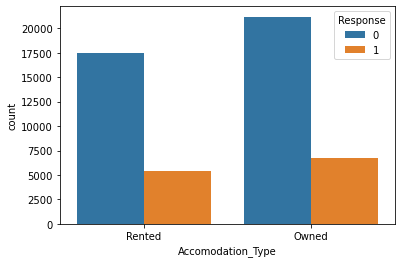

In [115]:
#visualizing the relationship between customers Accomodation Type and their response
sns.countplot('Accomodation_Type',hue='Response',data=train_data)
print(train_data.Accomodation_Type.value_counts())

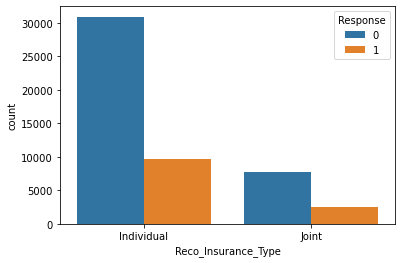

In [116]:
#individual and joint insurence holders response
sns.countplot('Reco_Insurance_Type',hue='Response',data=train_data)

['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']


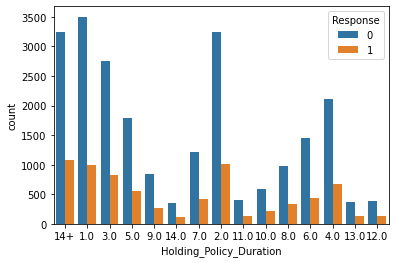

In [117]:
#relation between the duration and the response of the customer
sns.countplot('Holding_Policy_Duration',hue='Response',data=train_data)
print(train_data['Holding_Policy_Duration'].unique())

[ 3. nan  1.  4.  2.]


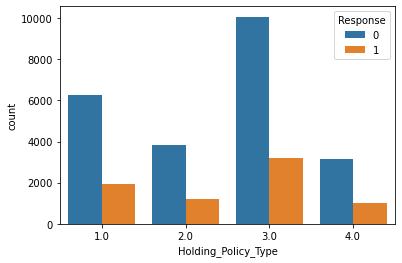

In [118]:
# checking how customers responding based on their policy type
sns.countplot('Holding_Policy_Type',hue='Response',data=train_data)
print(train_data['Holding_Policy_Type'].unique())

In [119]:
#Holding_Policy_Duration are in OBJECT type so i'm convertingb them into numeric
train_data.Holding_Policy_Duration=pd.to_numeric(train_data.Holding_Policy_Duration,errors='coerce')

In [120]:
# checking how many helth indicators are there
train_data['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [121]:
#checking the data types 
train_data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [122]:
#checking for the null values
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    24586
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

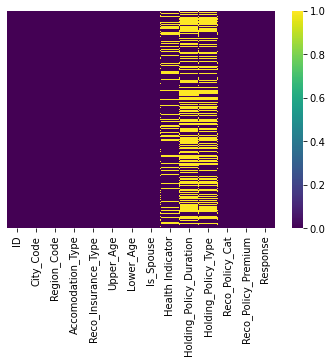

In [123]:
#ploting the heatmap for null values
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

In [124]:
#checking the unique values in all columns
def unique():
    for item in train_data.columns:
        print(item)
        print(train_data[item].unique())
unique()

ID
[    1     2     3 ... 50880 50881 50882]
City_Code
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
Region_Code
[3213 1117 3732 ... 5326 6149 5450]
Accomodation_Type
['Rented' 'Owned']
Reco_Insurance_Type
['Individual' 'Joint']
Upper_Age
[36 75 32 52 44 28 59 21 66 20 27 34 43 55 23 18 22 25 24 40 26 56 35 63
 49 64 67 42 71 57 73 31 19 48 65 54 33 30 69 68 37 29 62 58 38 39 60 41
 45 51 46 70 61 74 53 72 50 47]
Lower_Age
[36 22 32 48 44 52 28 73 43 26 21 47 66 20 27 34 55 23 18 25 24 56 35 63
 64 67 75 42 71 68 31 19 65 54 33 74 30 69 29 62 58 39 60 57 41 40 45 37
 51 59 49 38 46 70 61 53 16 72 50 17]
Is_Spouse
['No' 'Yes']
Health Indicator
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
Holding_Policy_Duration
[nan  1.  3.  5.  9. 14.  7.  2. 11. 10.  8.  6.  4. 13. 12.]
Holding_Policy_Type
[ 3. nan  1.  4.  2.]
Reco_

In [125]:
#droping the null values
train_data.dropna(inplace=True)

In [126]:
# checking for null values
train_data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [127]:
# droping a City_Code column
train_data.drop('City_Code',axis=1,inplace=True)

In [128]:
train_data.head(5)

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
4,5,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
7,8,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
11,12,1097,Owned,Joint,59,47,Yes,X3,3.0,3.0,13,25043.2,0


in next 4 cell's i am creating dummy values fro better training

In [129]:
AccomodationType=pd.get_dummies(train_data['Accomodation_Type'],drop_first=True)
AccomodationType.head(5)

,Rented
4,1
5,1
7,0
8,0
11,0


In [130]:
RecoInsuranceType=pd.get_dummies(train_data['Reco_Insurance_Type'],drop_first=True)
RecoInsuranceType.head(5)

,Joint
4,0
5,0
7,1
8,1
11,1


In [131]:
IsSpouse=pd.get_dummies(train_data['Is_Spouse'],drop_first=True)
IsSpouse.head(5)

,Yes
4,0
5,0
7,1
8,0
11,1


In [132]:
HealthIndicator=pd.get_dummies(train_data['Health Indicator'],drop_first=True)
HealthIndicator.head(5)

,X2,X3,X4,X5,X6,X7,X8,X9
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0


In [133]:
#here concatinating all dummy values with the training data
train_data=pd.concat([train_data,AccomodationType,RecoInsuranceType,IsSpouse,HealthIndicator],axis=1)
train_data.head(5)

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,Joint,Yes,X2,X3,X4,X5,X6,X7,X8,X9
4,5,2190,Rented,Individual,44,44,No,X2,3.0,1.0,...,0,0,1,0,0,0,0,0,0,0
5,6,1785,Rented,Individual,52,52,No,X2,5.0,1.0,...,0,0,1,0,0,0,0,0,0,0
7,8,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,...,1,1,0,0,1,0,0,0,0,0
8,9,3497,Owned,Joint,52,43,No,X1,14.0,3.0,...,1,0,0,0,0,0,0,0,0,0
11,12,1097,Owned,Joint,59,47,Yes,X3,3.0,3.0,...,1,1,0,1,0,0,0,0,0,0


In [134]:
#after concatination droping the old columns
train_data.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],axis=1,inplace=True)

In [135]:
#printing the final train_data set
train_data.head(5)

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Rented,Joint,Yes,X2,X3,X4,X5,X6,X7,X8,X9
4,5,2190,44,44,3.0,1.0,16,10404.0,0,1,0,0,1,0,0,0,0,0,0,0
5,6,1785,52,52,5.0,1.0,22,15264.0,1,1,0,0,1,0,0,0,0,0,0,0
7,8,3175,75,73,9.0,4.0,17,29344.0,1,0,1,1,0,0,1,0,0,0,0,0
8,9,3497,52,43,14.0,3.0,1,27283.2,0,0,1,0,0,0,0,0,0,0,0,0
11,12,1097,59,47,3.0,3.0,13,25043.2,0,0,1,1,0,1,0,0,0,0,0,0


In [136]:
#segrigating the feature and label
x=train_data.drop('Response',axis=1)
y=train_data['Response']

In [137]:
#test data set
test_data.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [138]:
#converting object values into numeric
test_data.Holding_Policy_Duration=pd.to_numeric(test_data.Holding_Policy_Duration,errors='coerce')

In [139]:
#droping city code column
test_data.drop('City_Code',axis=1,inplace=True)

In [140]:
#auto filling the null values
test_data["Health Indicator"].fillna( method ='ffill', inplace = True)

In [141]:
#auto filling the null values
test_data["Holding_Policy_Duration"].fillna( method ='ffill', inplace = True)

In [142]:
#auto filling the null values
test_data["Holding_Policy_Type"].fillna( method ='ffill', inplace = True)

creating some dummy values for better result

In [143]:
AccomodationType_test=pd.get_dummies(test_data['Accomodation_Type'],drop_first=True)
AccomodationType_test.head(5)

,Rented
0,0
1,0
2,1
3,1
4,0


In [144]:
RecoInsuranceType_test=pd.get_dummies(test_data['Reco_Insurance_Type'],drop_first=True)
RecoInsuranceType_test.head(5)

,Joint
0,0
1,1
2,0
3,0
4,0


In [145]:
IsSpouse_test=pd.get_dummies(test_data['Is_Spouse'],drop_first=True)
IsSpouse_test.head(5)

,Yes
0,0
1,1
2,0
3,0
4,0


In [146]:
HealthIndicator_test=pd.get_dummies(test_data['Health Indicator'],drop_first=True)
HealthIndicator_test.head(5)

,X2,X3,X4,X5,X6,X7,X8,X9
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [147]:
#concatinating the dummy values with test_data set
test_data=pd.concat([test_data,AccomodationType_test,RecoInsuranceType_test,IsSpouse_test,HealthIndicator_test],axis=1)
test_data.head(5)

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,...,Joint,Yes,X2,X3,X4,X5,X6,X7,X8,X9
0,50883,156,Owned,Individual,30,30,No,NaN,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,50884,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,...,1,1,0,0,0,0,0,0,0,0
2,50885,564,Rented,Individual,28,28,No,X3,2.0,4.0,...,0,0,0,1,0,0,0,0,0,0
3,50886,1177,Rented,Individual,23,23,No,X3,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
4,50887,951,Owned,Individual,75,75,No,X3,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0


In [148]:
#after concatenation dropping the old columns 
test_data.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],axis=1,inplace=True)

In [149]:
test_data.isnull().sum()

ID                         0
Region_Code                0
Upper_Age                  0
Lower_Age                  0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Rented                     0
Joint                      0
Yes                        0
X2                         0
X3                         0
X4                         0
X5                         0
X6                         0
X7                         0
X8                         0
X9                         0
dtype: int64

In [151]:
#final test_data set
print(test_data.shape)
test_data.head(5)

(21805, 19)


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Rented,Joint,Yes,X2,X3,X4,X5,X6,X7,X8,X9
0,50883,156,30,30,6.0,3.0,5,11934.0,0,0,0,0,0,0,0,0,0,0,0
1,50884,7,69,68,3.0,3.0,18,32204.8,0,1,1,0,0,0,0,0,0,0,0
2,50885,564,28,28,2.0,4.0,17,9240.0,1,0,0,0,1,0,0,0,0,0,0
3,50886,1177,23,23,3.0,3.0,18,9086.0,1,0,0,0,1,0,0,0,0,0,0
4,50887,951,75,75,3.0,3.0,5,22534.0,0,0,0,0,1,0,0,0,0,0,0


In [154]:
# importing a LogisticRegression
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x,y)# fitting a x,y into model

LogisticRegression()

In [155]:
#checking training accuracy
model_log.score(x,y)

0.7601483312731767

In [157]:
#predicting test_data
predict=model_log.predict(test_data)

In [159]:
#response of first five customers
predict[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# data set look imbalenced so 

In [160]:
# here i'm applying under sampler methoed

In [161]:
# importing RandomUnderSampler from 
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
#fitting and splliting the train data into under_train_feature and under_train_labels
x_train_under, y_train_under = under_sampler.fit_sample(x, y)

In [162]:
x_train_under.shape

(9702, 19)

In [164]:
from sklearn.linear_model import LogisticRegression
under_model=LogisticRegression()
under_model.fit(x_train_under,y_train_under)# fitting model into logisticregression

LogisticRegression()

In [166]:
#predicting test data
pre2=under_model.predict(test_data)

In [168]:
#training data accuracy
under_model.score(x,y)

0.49552533992583436

In [169]:
# here i'm applying over sampling method

In [171]:
# importing over sampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
over_sampler=RandomOverSampler()
# splitting the data
x_train_over,y_train_over=over_sampler.fit_sample(x,y)


In [172]:
over_model=LogisticRegression()
#fitting over sampler data into logisticregressor
over_model.fit(x_train_over,y_train_over)


LogisticRegression()

In [173]:
#trainng accuracy
over_model.score(x_train_over,y_train_over)

0.5464095225705737

In [174]:
pred_over=over_model.predict(test_data)

In [175]:
#put=pd.DataFrame(data={"ID":test_data["ID"],"Response":pred_over}).to_csv('sam_over(3).csv',index=False)